In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os,cv2

In [14]:
def plot_gallery(images, titles, h, w, n_row=3, ncol=4):
  """Helper function to plot a gallery of potraits"""
  plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))  # Added comma between n_col and n_row
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(n_row * ncol):
    plt.subplot(n_row, ncol, i + 1)
    plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())


In [15]:
dir_name = "C:/Users/krish/Downloads/dataset/dataset/faces"
y = []  # List to store class labels (person IDs)
x = []  # List to store image features (flattened arrays)
target_names = []  # List to store class names (person names)
person_id = 0
h = w = 300  # Image height and width for resizing

n_samples = 0  # Counter for total number of images
class_names = []  # List to store unique class names (person names)

# Print the dataset directory path for verification (optional)
print(dir_name)

# Iterate over directory names within 'dir_name'
for directory in os.listdir(dir_name):
    dir_path = os.path.join(dir_name, directory)  # Construct full directory path

    # Handle potential empty directories gracefully (optional)
    if not os.path.isdir(dir_path):
        print(f"Skipping non-directory: {dir_path}")
        continue

    class_names.append(directory)  # Add directory name (person name) as class name

    # Iterate over image names within the current directory
    for image_name in os.listdir(dir_path):
        image_path = os.path.join(dir_path, image_name)  # Construct full image path

        # Read the image using OpenCV
        img = cv2.imread(image_path)

        # Error handling for potential corrupted or missing images (optional)
        if img is None:
            print(f"Error reading image: {image_path}")
            continue

        # Convert to grayscale, resize, and flatten the image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray, (h, w))
        v = resized_image.flatten()

        # Add image features and class label (person ID)
        x.append(v)
        y.append(person_id)

        n_samples += 1

    person_id += 1  # Increment person ID after processing a directory's images

# Convert lists to NumPy arrays for efficient processing
y = np.array(y)
x = np.array(x)
target_names = np.array(target_names)
n_features = x.shape[1]  # Number of features (image dimensions)
print(y.shape,x.shape,target_names.shape)

print(f"Number of samples: {n_samples}")
print("Total dataset size:")
print(f"n_samples: {n_samples}")
print(f"n_features: {n_features}")
print(f"n_classes: {len(set(target_names))}")  # Number of unique classes (person names)


C:/Users/krish/Downloads/dataset/dataset/faces
(450,) (450, 90000) (0,)
Number of samples: 450
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 0


Extracting the top 150 eigenfaces from 337 faces


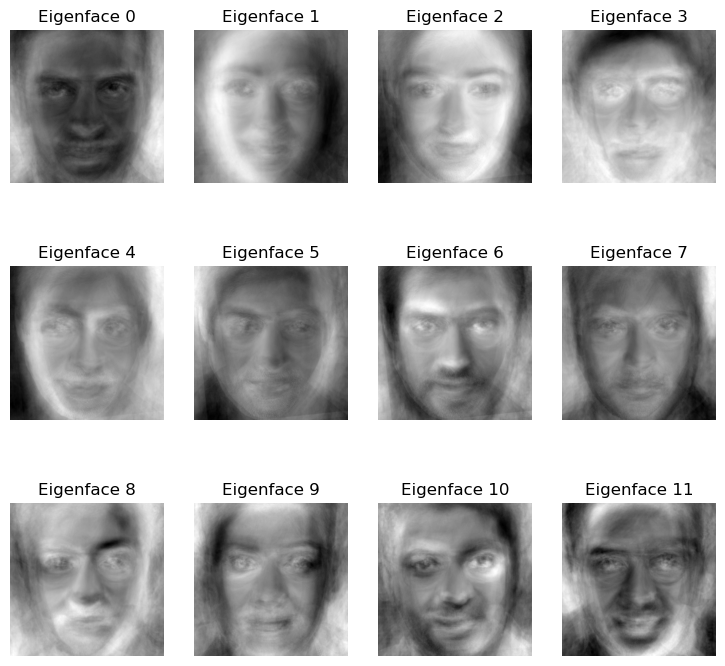

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
Projection done...


In [23]:
# Assuming x, y, h, and w are defined elsewhere (image data, height, width)

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
  """Helper function to plot a gallery of images.

  Args:
      images: List of images to be plotted.
      titles: List of titles corresponding to each image.
      h: Height of each image.
      w: Width of each image.
      n_row: Number of rows in the gallery (default: 3).
      n_col: Number of columns in the gallery (default: 4).
  """

  plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))  # Set figure size based on rows, columns
  plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)  # Adjust spacing

  for i in range(n_row * n_col):
    if i < len(images):  # Check if we have enough images
      image = images[i].reshape(h, w)  # Reshape image if needed
      plt.subplot(n_row, n_col, i + 1)  # Create subplot
      plt.imshow(image, cmap='gray')  # Plot image in grayscale
      plt.title(titles[i], fontsize=12)  # Add title
      plt.axis('off')  # Hide axes

  plt.show()

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42
)

############################################################################
# PCA (Eigenfaces) for Unsupervised Feature Extraction
n_components = 150

print(f"Extracting the top {n_components} eigenfaces from {x_train.shape[0]} faces")

# Applying PCA (deprecated 'white' argument removed)
pca = PCA(n_components=n_components, svd_solver='randomized').fit(x_train)

# Generating eigenfaces
eigenfaces = pca.components_.reshape((n_components, h, w))

# Plotting the gallery of the most significant eigenfaces
eigenfaces_titles = [f"Eigenface {i}" for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenfaces_titles, h, w)

plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train_pca.shape, x_test_pca.shape)

# %% Fisherfaces for Supervised Dimensionality Reduction
lda = LinearDiscriminantAnalysis()

# Compute LDA of reduced data (using transformed data)
lda.fit(x_train_pca, y_train)

x_train_lda = lda.transform(x_train_pca)
x_test_lda = lda.transform(x_test_pca)
print("Projection done...")


In [19]:
# Training with Multi layer perception
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10),max_iter=1000, verbose=True).fit(x_train_lda,y_train)
print("Model Weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 2.68270859
Iteration 2, loss = 2.63740594
Iteration 3, loss = 2.59504045
Iteration 4, loss = 2.55328762
Iteration 5, loss = 2.51318931
Iteration 6, loss = 2.47490622
Iteration 7, loss = 2.43793921
Iteration 8, loss = 2.40147561
Iteration 9, loss = 2.36794998
Iteration 10, loss = 2.33449723
Iteration 11, loss = 2.30352341
Iteration 12, loss = 2.27326504
Iteration 13, loss = 2.24406591
Iteration 14, loss = 2.21587583
Iteration 15, loss = 2.18828267
Iteration 16, loss = 2.16173671
Iteration 17, loss = 2.13682981
Iteration 18, loss = 2.11238178
Iteration 19, loss = 2.08862233
Iteration 20, loss = 2.06510393
Iteration 21, loss = 2.04285549
Iteration 22, loss = 2.02034192
Iteration 23, loss = 1.99863535
Iteration 24, loss = 1.97705539
Iteration 25, loss = 1.95570075
Iteration 26, loss = 1.93534158
Iteration 27, loss = 1.91469224
Iteration 28, loss = 1.89459828
Iteration 29, loss = 1.87486179
Iteration 30, loss = 1.85531873
Iteration 31, loss = 1.83627879
Iteration 32, los

Iteration 308, loss = 0.06467974
Iteration 309, loss = 0.06439953
Iteration 310, loss = 0.06409519
Iteration 311, loss = 0.06382247
Iteration 312, loss = 0.06353652
Iteration 313, loss = 0.06325996
Iteration 314, loss = 0.06297060
Iteration 315, loss = 0.06270538
Iteration 316, loss = 0.06243186
Iteration 317, loss = 0.06215347
Iteration 318, loss = 0.06186828
Iteration 319, loss = 0.06162633
Iteration 320, loss = 0.06135600
Iteration 321, loss = 0.06110281
Iteration 322, loss = 0.06082702
Iteration 323, loss = 0.06056076
Iteration 324, loss = 0.06030815
Iteration 325, loss = 0.06003538
Iteration 326, loss = 0.05978949
Iteration 327, loss = 0.05952318
Iteration 328, loss = 0.05926912
Iteration 329, loss = 0.05904326
Iteration 330, loss = 0.05878274
Iteration 331, loss = 0.05852997
Iteration 332, loss = 0.05827633
Iteration 333, loss = 0.05802753
Iteration 334, loss = 0.05781742
Iteration 335, loss = 0.05757727
Iteration 336, loss = 0.05730789
Iteration 337, loss = 0.05705919
Iteration 

Accuracy: 70.79646017699115


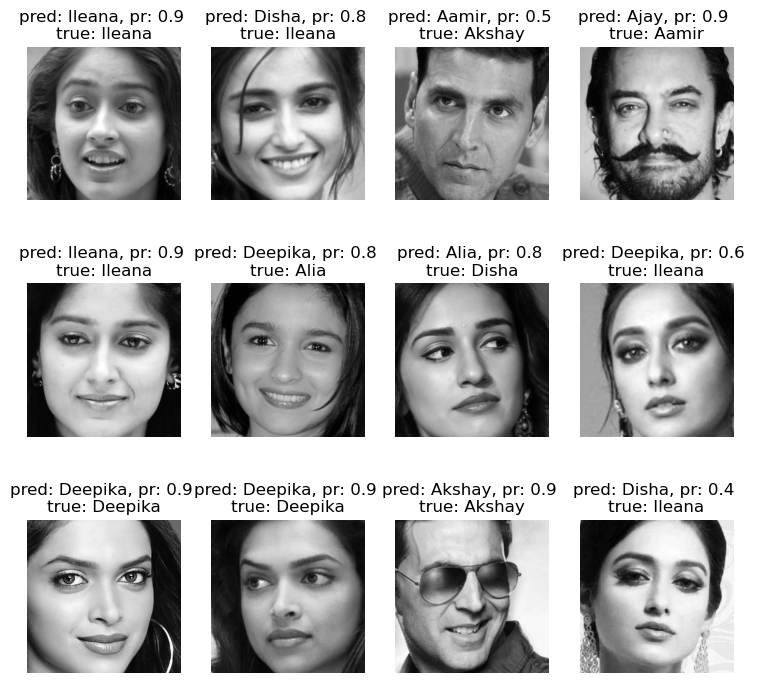

In [20]:
y_pred=[];y_prob=[]
for test_face in x_test_lda:
    prob = clf.predict_proba([test_face])[0]
    #print(prob,np.max(prob))
    class_id= np.where(prob== np.max(prob))[0][0]
    # print(Class_index)
    # find the label of the mathed face
    y_pred.append(class_id)
    y_prob.append(np.max(prob))
    
# Transform the data
y_pred = np.array(y_pred)

prediction_titles=[]
true_positive=0
for i in range(y_pred.shape[0]):
    # print(y_test[i],y_pred[i])
    # true_name = target_names[y_test[i]].rsplit(' ',1)[-1]
    # pred_name = target_names[y_test[i]].rsplit(' ',1)[-1]
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i])[0:3], true_name)
    # result = 'prediction: %s \ntrue:      %s' % (pred_name, true_name)
    prediction_titles.append(result)
    if true_name==pred_name:
        true_positive = true_positive+1
        
print("Accuracy:",true_positive*100/y_pred.shape[0])
   
## Plot results
plot_gallery(x_test, prediction_titles, h, w)
plt.show()
        